In [20]:
import time 
from sklearn import metrics 
import pickle as pickle 
import pandas as pd
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
from IPython.display import Image  
import os

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import ShuffleSplit

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



In [6]:
# load the data 
cancer = load_breast_cancer() 
df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
df['target'] = cancer.target

x = cancer.data
y = cancer.target

print('data:',x.shape)
print('target:',y.shape)

# print the first five lines
df.head()



data: (569, 30)
target: (569,)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

array([[<AxesSubplot:title={'center':'mean radius'}>,
        <AxesSubplot:title={'center':'mean texture'}>,
        <AxesSubplot:title={'center':'mean perimeter'}>,
        <AxesSubplot:title={'center':'mean area'}>,
        <AxesSubplot:title={'center':'mean smoothness'}>,
        <AxesSubplot:title={'center':'mean compactness'}>],
       [<AxesSubplot:title={'center':'mean concavity'}>,
        <AxesSubplot:title={'center':'mean concave points'}>,
        <AxesSubplot:title={'center':'mean symmetry'}>,
        <AxesSubplot:title={'center':'mean fractal dimension'}>,
        <AxesSubplot:title={'center':'radius error'}>,
        <AxesSubplot:title={'center':'texture error'}>],
       [<AxesSubplot:title={'center':'perimeter error'}>,
        <AxesSubplot:title={'center':'area error'}>,
        <AxesSubplot:title={'center':'smoothness error'}>,
        <AxesSubplot:title={'center':'compactness error'}>,
        <AxesSubplot:title={'center':'concavity error'}>,
        <AxesSubplot:tit

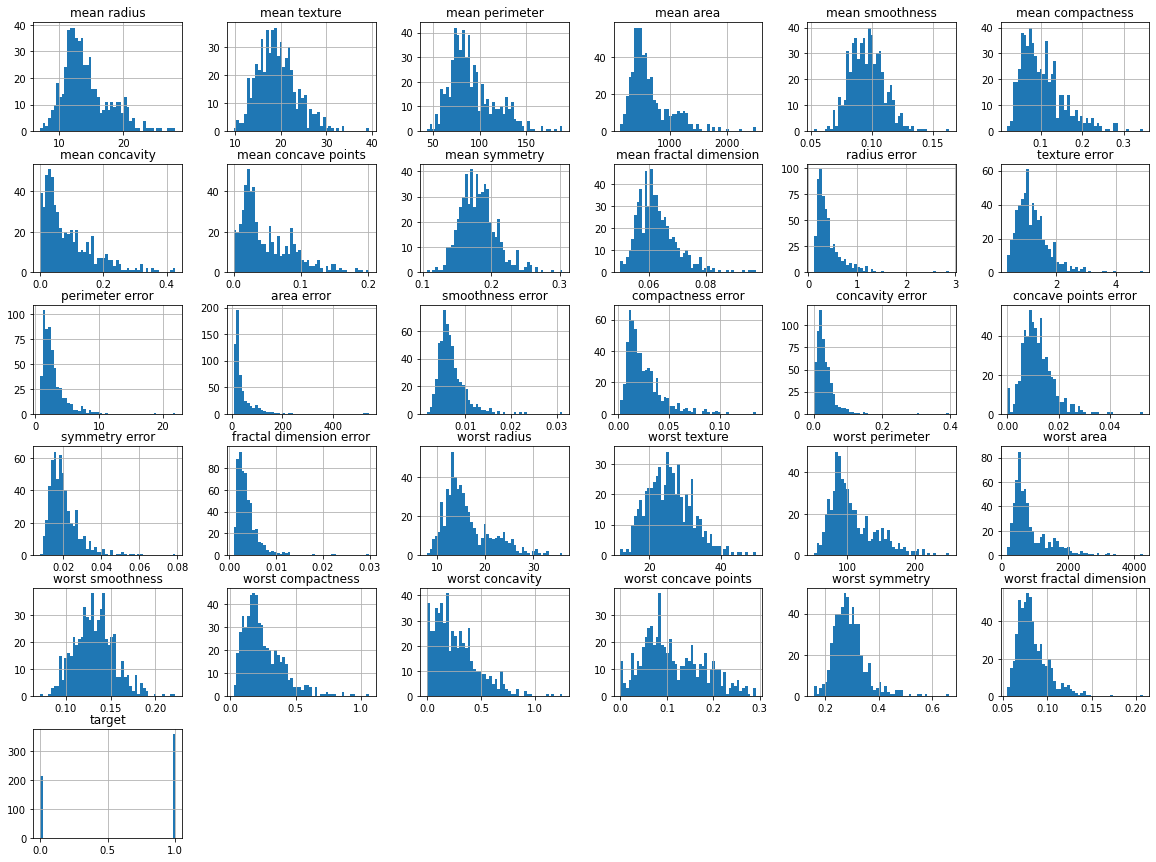

In [9]:
df.hist(bins=50,figsize=(20,15))

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [11]:
df_train = pd.DataFrame(x_train,columns=cancer.feature_names)
df_train['target'] = y_train

df_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,11.690,24.44,76.37,406.4,0.12360,0.15520,0.04515,0.04531,0.2131,0.07405,...,32.19,86.12,487.7,0.1768,0.3251,0.13950,0.13080,0.2803,0.09970,1
1,12.980,19.35,84.52,514.0,0.09579,0.11250,0.07107,0.02950,0.1761,0.06540,...,21.95,99.21,634.3,0.1288,0.3253,0.34390,0.09858,0.3596,0.09166,1
2,28.110,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,0.1648,0.05525,...,18.47,188.50,2499.0,0.1142,0.1516,0.32010,0.15950,0.1648,0.05525,0
3,11.060,14.96,71.49,373.9,0.10330,0.09097,0.05397,0.03341,0.1776,0.06907,...,19.90,79.76,440.0,0.1418,0.2210,0.22990,0.10750,0.3301,0.09080,1
4,25.220,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,0.1829,0.06782,...,33.62,211.70,2562.0,0.1573,0.6076,0.64760,0.28670,0.2355,0.10510,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,9.876,17.27,62.92,295.4,0.10890,0.07232,0.01756,0.01952,0.1934,0.06285,...,23.22,67.08,331.6,0.1415,0.1247,0.06213,0.05588,0.2989,0.07380,1
377,19.000,18.91,123.40,1138.0,0.08217,0.08028,0.09271,0.05627,0.1946,0.05044,...,25.73,148.20,1538.0,0.1021,0.2264,0.32070,0.12180,0.2841,0.06541,0
378,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,0.1621,0.05952,...,36.92,68.03,349.9,0.1110,0.1109,0.07190,0.04866,0.2321,0.07211,1
379,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,0


In [12]:
df_test = pd.DataFrame(x_test,columns=cancer.feature_names)
df_test['target'] = y_test

df_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,15.080,25.74,98.00,716.6,0.10240,0.09769,0.123500,0.065530,0.1647,0.06464,...,33.22,121.20,1050.0,0.1660,0.23560,0.40290,0.15260,0.2654,0.09438,0
1,12.000,28.23,76.77,442.5,0.08437,0.06450,0.040550,0.019450,0.1615,0.06104,...,37.88,85.07,523.7,0.1208,0.18560,0.18110,0.07116,0.2447,0.08194,1
2,13.110,15.56,87.21,530.2,0.13980,0.17650,0.207100,0.096010,0.1925,0.07692,...,22.40,106.40,827.2,0.1862,0.40990,0.63760,0.19860,0.3147,0.14050,0
3,14.690,13.98,98.22,656.1,0.10310,0.18360,0.145000,0.063000,0.2086,0.07406,...,18.34,114.10,809.2,0.1312,0.36350,0.32190,0.11080,0.2827,0.09208,1
4,12.340,22.22,79.85,464.5,0.10120,0.10150,0.053700,0.028220,0.1551,0.06761,...,28.68,87.36,553.0,0.1452,0.23380,0.16880,0.08194,0.2268,0.09082,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,11.950,14.96,77.23,426.7,0.11580,0.12060,0.011710,0.017870,0.2459,0.06581,...,17.72,83.09,496.2,0.1293,0.18850,0.03122,0.04766,0.3124,0.07590,1
184,19.530,32.47,128.00,1223.0,0.08420,0.11300,0.114500,0.066370,0.1428,0.05313,...,45.41,180.20,2477.0,0.1408,0.40970,0.39950,0.16250,0.2713,0.07568,0
185,14.030,21.25,89.79,603.4,0.09070,0.06945,0.014620,0.018960,0.1517,0.05835,...,30.28,98.27,715.5,0.1287,0.15130,0.06231,0.07963,0.2226,0.07617,1
186,13.590,21.84,87.16,561.0,0.07956,0.08259,0.040720,0.021420,0.1635,0.05859,...,30.04,97.66,661.5,0.1005,0.17300,0.14530,0.06189,0.2446,0.07024,1


In [13]:
# KNN Classifier 
def knn_classifier(train_x, train_y): 
    model = KNeighborsClassifier() 
    model.fit(train_x, train_y) 
    return model 
  
# Decision Tree Classifier 
def decision_tree_classifier(train_x, train_y): 
    model = DecisionTreeClassifier() 
    model.fit(train_x, train_y) 
    return model 

# SVM Classifier 
def svm_classifier(train_x, train_y): 
    model = SVC(kernel='rbf', probability=True) 
    model.fit(train_x, train_y) 
    return model 

# Boosting Classifier
def adaboost_classifier(train_x, train_y): 
    model = AdaBoostClassifier(DecisionTreeClassifier(),algorithm="SAMME", n_estimators=7, learning_rate=0.4)
    model.fit(train_x, train_y)
    return model

# Neural Networks Classifier
def neural_networks_classifier(train_x, train_y):
    model = MLPClassifier(activation='relu', alpha=0.0001,solver='adam')
    model.fit(train_x, train_y)
    return model


In [14]:
test_classifiers = ['KNN(K_Nearest_neghibours)', 'DT(Decision_tree)', 'SVM(Support_vector_machine)','Adaboost','NN(Neural_Networks)'] 
classifiers = {
    'Adaboost':adaboost_classifier,
    'KNN(K_Nearest_neghibours)':knn_classifier,
    'DT(Decision_tree)':decision_tree_classifier,
    'SVM(Support_vector_machine)':svm_classifier,
    'NN(Neural_Networks)':neural_networks_classifier
}

In [15]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    return plt

In [16]:
# def plot_roc_curve(fpr, tpr, label=None):
#     plt.plot(fpr, tpr, linewidth=2, label=label)
#     plt.plot([0,1], [0,1], 'k--')
#     plt.axis([0,1,0,1])
#     plt.legend()
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')

******************* KNN(K_Nearest_neghibours) ********************
KNeighborsClassifier()
training took 0.003030s!
precision: 91.20%, recall: 96.61%
accuracy: 92.02%

classification_report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        70
           1       0.91      0.97      0.94       118

    accuracy                           0.92       188
   macro avg       0.92      0.90      0.91       188
weighted avg       0.92      0.92      0.92       188


confusion_matrix:
[[ 59  11]
 [  4 114]]
elaspe: 0.661215


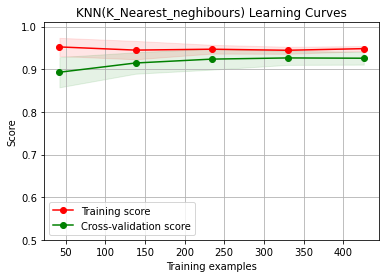

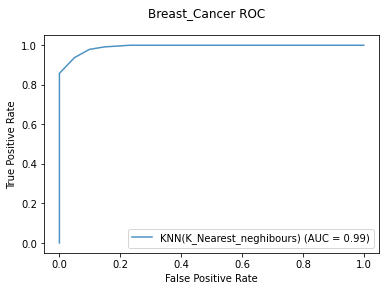


******************* DT(Decision_tree) ********************
DecisionTreeClassifier()
training took 0.005699s!
precision: 92.62%, recall: 95.76%
accuracy: 92.55%

classification_report:
              precision    recall  f1-score   support

           0       0.92      0.87      0.90        70
           1       0.93      0.96      0.94       118

    accuracy                           0.93       188
   macro avg       0.93      0.91      0.92       188
weighted avg       0.93      0.93      0.93       188


confusion_matrix:
[[ 61   9]
 [  5 113]]
elaspe: 0.193360


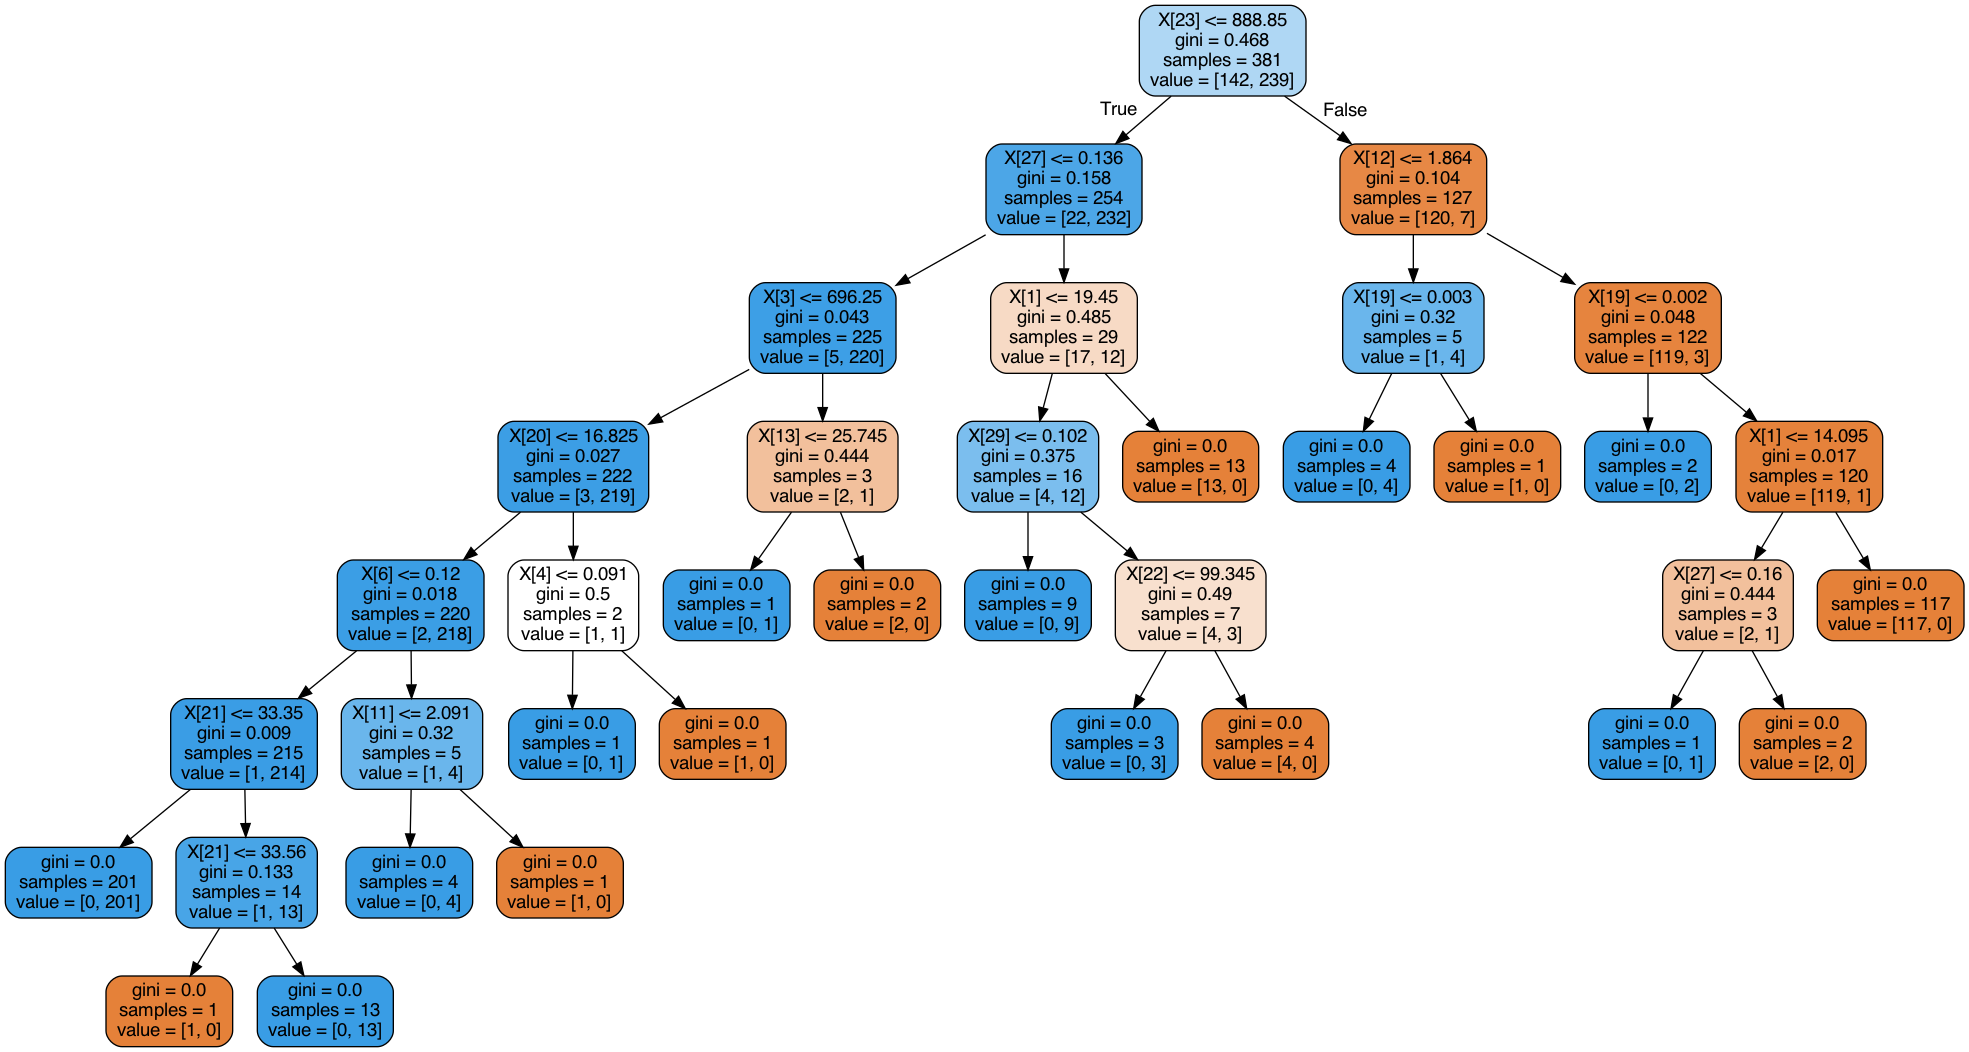

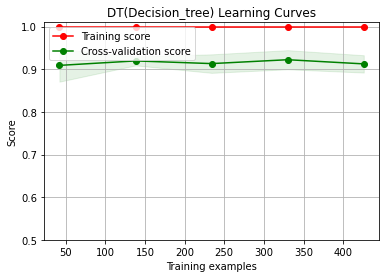

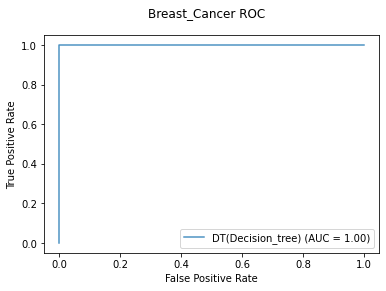


******************* SVM(Support_vector_machine) ********************
SVC(probability=True)
training took 0.012866s!
precision: 87.97%, recall: 99.15%
accuracy: 90.96%

classification_report:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86        70
           1       0.88      0.99      0.93       118

    accuracy                           0.91       188
   macro avg       0.93      0.88      0.90       188
weighted avg       0.92      0.91      0.91       188


confusion_matrix:
[[ 54  16]
 [  1 117]]
elaspe: 0.431312


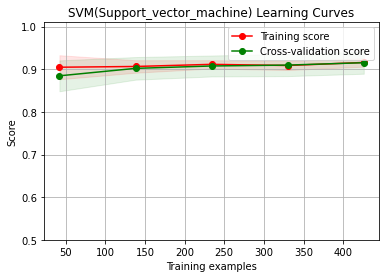

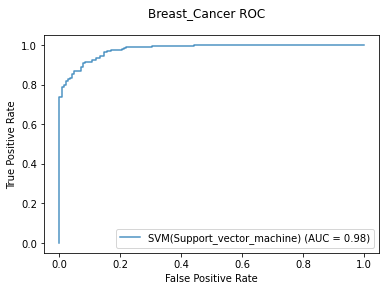


******************* Adaboost ********************
AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   learning_rate=0.4, n_estimators=7)
training took 0.009270s!
precision: 95.73%, recall: 94.92%
accuracy: 94.15%

classification_report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        70
           1       0.96      0.95      0.95       118

    accuracy                           0.94       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.94      0.94      0.94       188


confusion_matrix:
[[ 65   5]
 [  6 112]]
elaspe: 0.278865


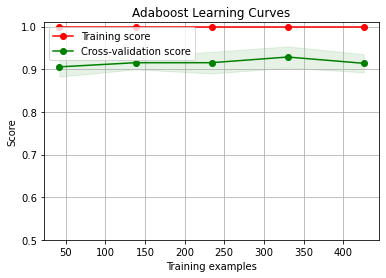

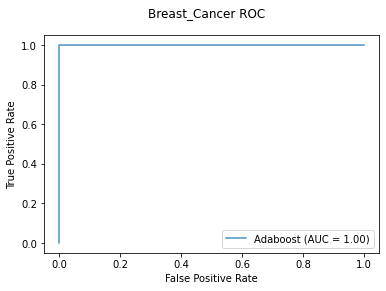


******************* NN(Neural_Networks) ********************
MLPClassifier()
training took 0.339857s!
precision: 91.74%, recall: 94.07%
accuracy: 90.96%

classification_report:
              precision    recall  f1-score   support

           0       0.90      0.86      0.88        70
           1       0.92      0.94      0.93       118

    accuracy                           0.91       188
   macro avg       0.91      0.90      0.90       188
weighted avg       0.91      0.91      0.91       188


confusion_matrix:
[[ 60  10]
 [  7 111]]
elaspe: 30.307951


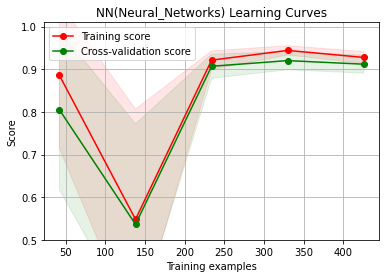

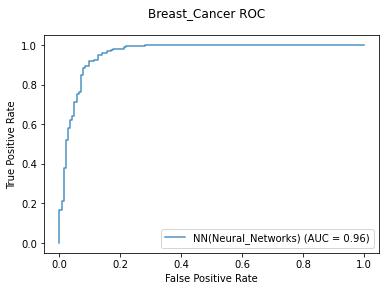

In [13]:
for classifier in test_classifiers:
    print('******************* %s ********************' % classifier)
    start_time = time.time()
    model = classifiers[classifier](x_train, y_train)
    print(model)
    print('training took %fs!' % (time.time() - start_time))
    predict = model.predict(x_test)
#     if model_save_file != None: 
#         model_save[classifier] = model )
    score = metrics.precision_score(y_test, predict) 
    recall = metrics.recall_score(y_test, predict)
    print('precision: %.2f%%, recall: %.2f%%' % (100 * score, 100 * recall)) 
    accuracy = metrics.accuracy_score(y_test, predict) 
    print('accuracy: %.2f%%' % (100 * accuracy))
    c_matrix = confusion_matrix(
        y_test,   # array, Gound true (correct) target values
        predict,  # array, Estimated targets as returned by a classifier
        labels=[0,1],  # array, List of labels to index the matrix.
        sample_weight=None  # array-like of shape = [n_samples], Optional sample weights
    )
    print('\nclassification_report:')
    print(classification_report( y_test,predict,labels=[0,1]))

    print('\nconfusion_matrix:')
    print(c_matrix)
    
    cv = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
    title = classifier+' Learning Curves'
    start = time.process_time()
    plot_learning_curve(model,title,cancer.data, cancer.target, ylim=(0.5, 1.01), cv=cv)

    print('elaspe: {0:.6f}'.format(time.process_time()-start))
    
    curve1 = plot_roc_curve(model, x_train, y_train,  alpha=0.8,name=classifier)
    curve1.figure_.suptitle("Breast_Cancer ROC")
    
    #draw DecisionTree
    if classifier == 'DT(Decision_tree)':
        dot_data = export_graphviz(model,
                                out_file = None,
                                # feature_names = iris_feature_name,
                                # class_names = iris_target_name,
                                filled=True,
                                rounded=True
                               )
        graph = pydotplus.graph_from_dot_data(dot_data)
        display(Image(graph.create_png()))
    plt.show()
    print()

In [14]:
# KNN_classifier
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                         metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                         weights='uniform')

KNeighborsClassifier()

In [15]:
# Decisiontree_Classifier
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

DecisionTreeClassifier(criterion='entropy')

In [16]:
# Boosting_Classifier
AdaBoostClassifier(algorithm='SAMME',  
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,  
                                                         class_weight=None,  
                                                         criterion='gini',  
                                                         max_depth=None,  
                                                         max_features=None,  
                                                         max_leaf_nodes=None,  
                                                         min_impurity_decrease=0.0,  
                                                         min_impurity_split=None,  
                                                         min_samples_leaf=1,  
                                                         min_samples_split=2,  
                                                         min_weight_fraction_leaf=0.0,  
                                                         presort='deprecated',  
                                                         random_state=None,  
                                                         splitter='best'),  
                   learning_rate=0.4, n_estimators=7, random_state=None)

AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   learning_rate=0.4, n_estimators=7)

In [17]:
# SVM_classifier
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

SVC(probability=True)

In [20]:
# Neural_Networks Classifier
MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, 
batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True,
 random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
 early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

MLPClassifier()

In [21]:
def grid_search(model,param_grid,train_x,train_y,cv=5):
    grid_search = GridSearchCV(model, param_grid=param_grid, n_jobs = -1, verbose=1) 
    grid_search.fit(train_x, train_y) 
    best_parameters = grid_search.best_estimator_.get_params() 
    print('Best Estimator:',best_parameters)
    return grid_search.best_estimator_

In [22]:

common_classifiers = ['KNN(K_Nearest_neghibours)','DT(Decision_tree)', 'SVM(Support_vector_machine)','NN(Neural_Networks)' ] 
ensem_classifiers = ['Adaboost']
basic_classifiers = {
    'KNN(K_Nearest_neghibours)':KNeighborsClassifier(),
    'DT(Decision_tree)': DecisionTreeClassifier() ,
    'SVM(Support_vector_machine)': SVC(kernel='rbf', probability=True),
    'NN(Neural_Networks)':MLPClassifier(),
    'Adaboost': AdaBoostClassifier(DecisionTreeClassifier(),algorithm="SAMME", n_estimators=7, learning_rate=0.4)
}
grid_params = {
    'KNN(K_Nearest_neghibours)':[
        {'weights':['uniform'],'n_neighbors':np.arange(4,8,1)},
        {'weights':['distance'],'n_neighbors':np.arange(4,8,1)},
    ],
    'DT(Decision_tree)':[
        {'min_samples_split':np.arange(1,15,1),'min_samples_leaf':np.arange(1,15,1),'splitter':['random']},
        {'min_samples_split':np.arange(1,15,1),'min_samples_leaf':np.arange(1,15,1),'splitter':['best']},
    ],
    'SVM(Support_vector_machine)':[
      {'C': [1e-1, 1, 10, 100, 1000], 'kernel': ['linear']},
      {'C': [1e-1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
    ],
    
    'NN(Neural_Networks)':[
        {
            'hidden_layer_sizes': [(3,5), (30,50), (200,400)],
            "alpha" : [0.001, 0.0001],
            'learning_rate': ['constant', 'invscaling'],
        }
    ]
}

ensem_params = {
    'Adaboost':{'n_estimators':np.arange(1,11,1),'learning_rate':np.arange(0.1,1,0.1)}
}



******************* KNN(K_Nearest_neghibours) ********************
Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Estimator: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
training took 0.174693s!
KNeighborsClassifier(n_neighbors=7, weights='distance')
precision: 90.55%, recall: 97.46%
accuracy: 92.02%

classification_report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89        70
           1       0.91      0.97      0.94       118

    accuracy                           0.92       188
   macro avg       0.93      0.90      0.91       188
weighted avg       0.92      0.92      0.92       188


confusion_matrix:
[[ 58  12]
 [  3 115]]



[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.2s finished


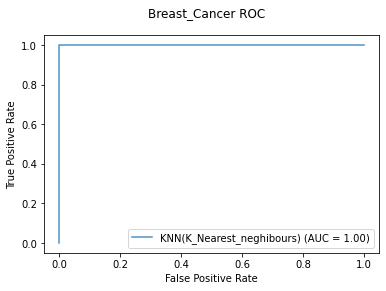

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


******************* DT(Decision_tree) ********************
Fitting 5 folds for each of 392 candidates, totalling 1960 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s


Best Estimator: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'random'}
training took 0.774900s!
DecisionTreeClassifier(min_samples_split=10, splitter='random')
precision: 94.83%, recall: 93.22%
accuracy: 92.55%

classification_report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        70
           1       0.95      0.93      0.94       118

    accuracy                           0.93       188
   macro avg       0.92      0.92      0.92       188
weighted avg       0.93      0.93      0.93       188


confusion_matrix:
[[ 64   6]
 [  8 110]]



[Parallel(n_jobs=-1)]: Done 1945 out of 1960 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1960 out of 1960 | elapsed:    1.2s finished


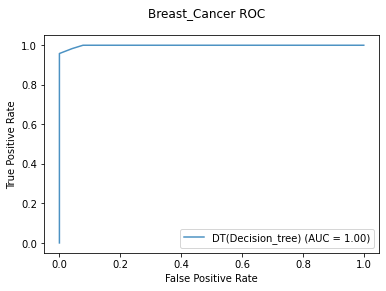

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


******************* SVM(Support_vector_machine) ********************
Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min


Best Estimator: {'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.0001, 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
training took 0.144889s!
SVC(C=10, gamma=0.0001, probability=True)
precision: 91.87%, recall: 95.76%
accuracy: 92.02%

classification_report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        70
           1       0.92      0.96      0.94       118

    accuracy                           0.92       188
   macro avg       0.92      0.91      0.91       188
weighted avg       0.92      0.92      0.92       188


confusion_matrix:
[[ 60  10]
 [  5 113]]



[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  2.0min finished


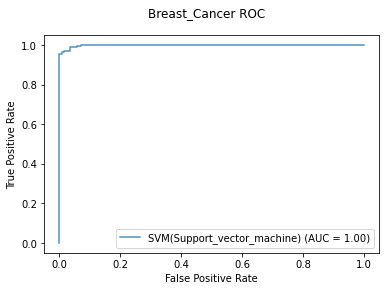

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


******************* NN(Neural_Networks) ********************
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  45 out of  60 | elapsed:    4.7s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.2s finished


Best Estimator: {'activation': 'relu', 'alpha': 0.001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (200, 400), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
training took 3.064638s!
MLPClassifier(alpha=0.001, hidden_layer_sizes=(200, 400))
precision: 87.79%, recall: 97.46%
accuracy: 89.89%

classification_report:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85        70
           1       0.88      0.97      0.92       118

    accuracy                           0.90       188
   macro avg       0.91      0.87      0.89       188
weighted avg       0.90      0.90      0.90       188


confusion_m

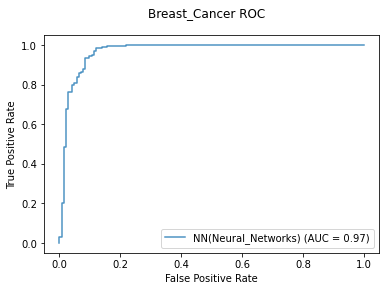

In [24]:
for classifier in common_classifiers:
    print('******************* %s ********************' % classifier)
    start_time = time.process_time()
    model = basic_classifiers[classifier]
    clf = grid_search(model,grid_params[classifier],x_train,y_train,cv=5) 
    print('training took %fs!' % (time.process_time() - start_time))
    print(clf)
    clf.fit(x_train,y_train)
    predict = clf.predict(x_test)

    score = metrics.precision_score(y_test, predict) 
    recall = metrics.recall_score(y_test, predict)
    print('precision: %.2f%%, recall: %.2f%%' % (100 * score, 100 * recall)) 
    accuracy = metrics.accuracy_score(y_test, predict) 
    print('accuracy: %.2f%%' % (100 * accuracy))
    c_matrix = confusion_matrix(
        y_test,   # array, Gound true (correct) target values
        predict,  # array, Estimated targets as returned by a classifier
        labels=[0,1],  # array, List of labels to index the matrix.
        sample_weight=None  # array-like of shape = [n_samples], Optional sample weights
    )
    print('\nclassification_report:')
    print(classification_report( y_test,predict,labels=[0,1]))

    print('\nconfusion_matrix:')
    print(c_matrix)
    print()
    curve1 = plot_roc_curve(clf, x_train, y_train,  alpha=0.8,name=classifier)
    curve1.figure_.suptitle("Breast_Cancer ROC")
    plt.show()




******************* Adaboost ********************
Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


Best Estimator: {'algorithm': 'SAMME', 'base_estimator__ccp_alpha': 0.0, 'base_estimator__class_weight': None, 'base_estimator__criterion': 'gini', 'base_estimator__max_depth': None, 'base_estimator__max_features': None, 'base_estimator__max_leaf_nodes': None, 'base_estimator__min_impurity_decrease': 0.0, 'base_estimator__min_impurity_split': None, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__min_weight_fraction_leaf': 0.0, 'base_estimator__presort': 'deprecated', 'base_estimator__random_state': None, 'base_estimator__splitter': 'best', 'base_estimator': DecisionTreeClassifier(), 'learning_rate': 0.30000000000000004, 'n_estimators': 5, 'random_state': None}
training took 0.398907s!
AdaBoostClassifier(algorithm='SAMME', base_estimator=DecisionTreeClassifier(),
                   learning_rate=0.30000000000000004, n_estimators=5)
precision: 95.76%, recall: 95.76%
accuracy: 94.68%

classification_report:
              precision    recall 

[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    0.6s finished


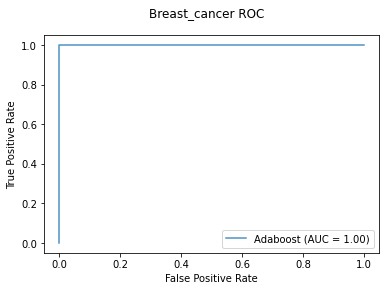

In [25]:
for classifier in ensem_classifiers:
    print('******************* %s ********************' % classifier)
    start_time = time.process_time()
    model = basic_classifiers[classifier]
    clf = grid_search(model,ensem_params[classifier],x_train,y_train,cv=5) 
    print('training took %fs!' % (time.process_time() - start_time))
    print(clf)
    clf.fit(x_train,y_train)
    predict = clf.predict(x_test)

    score = metrics.precision_score(y_test, predict) 
    recall = metrics.recall_score(y_test, predict)
    print('precision: %.2f%%, recall: %.2f%%' % (100 * score, 100 * recall)) 
    accuracy = metrics.accuracy_score(y_test, predict) 
    print('accuracy: %.2f%%' % (100 * accuracy))
    c_matrix = confusion_matrix(
        y_test,   
        predict,  
        labels=[0,1],  
        sample_weight=None  
    )
    print('\nclassification_report:')
    print(classification_report( y_test,predict,labels=[0,1]))

    print('\nconfusion_matrix:')
    print(c_matrix)

    print()
    curve1 = plot_roc_curve(clf, x_train, y_train,  alpha=0.8,name=classifier)
    curve1.figure_.suptitle("Breast_cancer ROC")
    plt.show()

